In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

import os
import numpy as np
import torch 

In [12]:
direcotry = 'data/images/'
files = os.listdir(direcotry)

train_dir = direcotry + files[1]
test_dir = direcotry + files[0]
train_dir, test_dir

('data/images/train', 'data/images/test')

In [13]:
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

## Image Folder for loading images 

In [14]:
train_data = ImageFolder(
    root=train_dir,
    transform=data_transforms,
    target_transform=None,
)

test_data = ImageFolder(
    root=test_dir,
    transform=data_transforms,
    target_transform=None,
)

In [16]:
train_dataloder = DataLoader(
    dataset=train_data,
    batch_size=1,
    num_workers=1,
    shuffle=True)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=1,
    num_workers=1,
    shuffle=False)

In [17]:
image, label = next(iter(train_dataloder))
image.shape, label

(torch.Size([1, 3, 64, 64]), tensor([0]))

In [18]:
image.squeeze().shape

torch.Size([3, 64, 64])

(-0.5, 63.5, 63.5, -0.5)

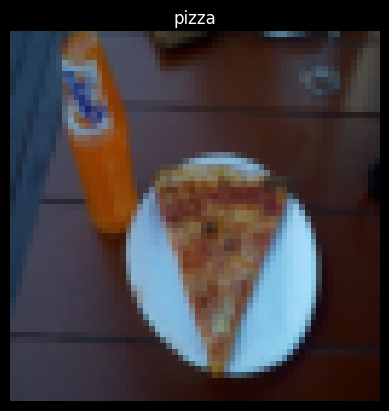

In [23]:
from matplotlib import pyplot as plt

plt.imshow(image.squeeze().permute(1,2,0))
plt.title(train_data.classes[label])
#plt.axes().get_xaxis().set_visible(False)
plt.axis(False)